# Mercury Customer Onboarding & Product Adoption Analysis

Matt Strautmann

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
orgs = pd.read_csv('organizations.csv')
orgs.head()

,organization_id,industry_type,industry,segment_size,segment_growth_potential
0,org_45554,Consulting and Marketing,mercury_marketing,(1) micro,(1) low
1,org_34718,E-commerce,mercury_retail_wholesale,(1) micro,(2) high
2,org_20069,Consulting and Marketing,mercury_marketing,(1) micro,(1) low
3,org_704,Consulting and Marketing,mercury_consulting_strategy,(1) micro,(1) low
4,org_29265,E-commerce,mercury_retail_wholesale,(1) micro,(1) low


In [3]:
print(f"Shape: {orgs.shape}")
orgs.info()

Shape: (500, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   organization_id           500 non-null    object
 1   industry_type             500 non-null    object
 2   industry                  500 non-null    object
 3   segment_size              500 non-null    object
 4   segment_growth_potential  500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


500 orgs total. 5 columns - all object types.

3 industry_types. E-commerce largest (223), Tech (153), Consulting (124). 15 specific industries.

Almost all micro (479/500). About 2/3 low growth (345), 1/3 high growth (155).

In [4]:
print("industry_type:")
print(orgs['industry_type'].value_counts())
print("\nindustry:")
print(orgs['industry'].value_counts())

industry_type:
industry_type
E-commerce                  223
Technology                  153
Consulting and Marketing    124
Name: count, dtype: int64

industry:
industry
mercury_retail_wholesale           89
mercury_marketing                  68
mercury_software                   58
mercury_online_retailer_amazon     56
mercury_online_retailer_shopify    45
mercury_b2b                        38
it_telecom                         24
mercury_artificial_intelligence    22
beauty_cosmetics                   22
mercury_advertising                17
mercury_consulting_strategy        14
mercury_consulting_financial       13
professional_services              12
mercury_developer_tools            11
shipping_warehousing               11
Name: count, dtype: int64


In [5]:
print("segment_size:")
print(orgs['segment_size'].value_counts())
print("\nsegment_growth_potential:")
print(orgs['segment_growth_potential'].value_counts())

segment_size:
segment_size
(1) micro     479
(2) small      13
(3) medium      8
Name: count, dtype: int64

segment_growth_potential:
segment_growth_potential
(1) low     345
(2) high    155
Name: count, dtype: int64


278 orgs approved, 235 deposited, 197 activated. 790 null dates means lots of incomplete stages.

55.6% get approved. 84.5% of approved make deposit. 70.9% of approved reach activation.

In [6]:
funnel = pd.read_csv('adoption_funnel.csv')
funnel.head(10)

,organization_id,funnel_stage,date
0,org_45554,application_submitted,2024-09-12
1,org_34718,application_submitted,2024-07-17
2,org_20069,application_submitted,2024-04-25
3,org_704,application_submitted,2024-01-06
4,org_29265,application_submitted,2024-06-15
5,org_31594,application_submitted,2024-06-28
6,org_62469,application_submitted,2024-12-12
7,org_10862,application_submitted,2024-03-07
8,org_2735,application_submitted,2024-01-19
9,org_18823,application_submitted,2024-04-19


In [7]:
print("funnel_stage:")
print(funnel['funnel_stage'].value_counts())
print(f"\nNull dates: {funnel['date'].isna().sum()}")

funnel_stage:
funnel_stage
application_submitted    500
approved                 500
first_deposit            500
first_active             500
Name: count, dtype: int64

Null dates: 790


Technology 69%, Consulting 57%, E-commerce 45% approval. Technology approved at much higher rate.

In [8]:
stage_completion = funnel.groupby('funnel_stage')['date'].apply(lambda x: x.notna().sum())
print(stage_completion)
print(f"\nTotal orgs: {funnel['organization_id'].nunique()}")

funnel_stage
application_submitted    500
approved                 278
first_active             197
first_deposit            235
Name: date, dtype: int64

Total orgs: 500


p < 0.001. Highly significant difference in approval rates by industry.

In [9]:
print(f"Approval rate: {278/500:.1%}")
print(f"Deposit rate (of approved): {235/278:.1%}")
print(f"Activation rate (of approved): {197/278:.1%}")

Approval rate: 55.6%
Deposit rate (of approved): 84.5%
Activation rate (of approved): 70.9%


173 orgs active on Bank Account, 136 on Debit Card, 20 Credit Card, 16 Invoicing.

Technology adopts Credit Card at 9% vs E-commerce at 1%. Tech also highest on Invoicing at 7%.

In [10]:
products = pd.read_csv('product_usage.csv')
products.head(10)

,organization_id,day,product,is_active
0,org_45554,2024-09-25,Bank Account,False
1,org_34718,2024-11-13,Invoicing,False
2,org_20069,2024-11-19,Invoicing,False
3,org_704,2024-09-13,Invoicing,False
4,org_29265,2024-12-27,Bank Account,False
5,org_31594,2024-07-31,Bank Account,False
6,org_62469,2024-12-15,Invoicing,False
7,org_10862,2024-09-09,Invoicing,False
8,org_2735,2024-03-21,Credit Card,True
9,org_18823,2024-04-28,Debit Card,False


Median time to activation is 18 days. Mean 37 days (skewed by long tail - max 277 days).

In [11]:
print("product:")
print(products['product'].value_counts())
print(f"\nis_active:")
print(products['is_active'].value_counts())
print(f"\nDate range: {products['day'].min()} to {products['day'].max()}")

product:
product
Bank Account    50120
Invoicing       50120
Credit Card     50120
Debit Card      50120
Name: count, dtype: int64

is_active:
is_active
False    174972
True      25508
Name: count, dtype: int64

Date range: 2024-01-02 to 2024-12-31


Technology activates fastest - median 11 days. E-commerce slowest at 28 days. Consulting 19 days.

In [12]:
orgs_funnel = orgs.merge(
    funnel[funnel['funnel_stage'] == 'approved'],
    on='organization_id',
    how='left'
)
orgs_funnel['approved'] = orgs_funnel['date'].notna()

industry_approval = orgs_funnel.groupby('industry_type')['approved'].agg(['sum', 'count'])
industry_approval['rate'] = industry_approval['sum'] / industry_approval['count']
industry_approval.sort_values('rate', ascending=False)

,sum,count,rate
industry_type,,,
Technology,106,153,0.692810
Consulting and Marketing,71,124,0.572581
E-commerce,101,223,0.452915


Bank Account adopted first 157 times. Makes sense - it's default. Debit Card 12, Invoicing 6, Credit Card 3.

Most orgs adopt 2 products (113 orgs). 39 orgs stick with just 1. Only 2 orgs adopted all 4.

81 product-org combinations churned out of 345. 23% churn rate overall.

Invoicing has highest churn at 44%. Credit Card 25%, Bank Account 24%, Debit Card 20%.

High growth orgs activate at 56%, low growth only 32%. Big difference.

High growth orgs adopt products 2x more. Bank Account 50% vs 28%, Credit Card 11% vs 1%, Debit Card 39% vs 22%.

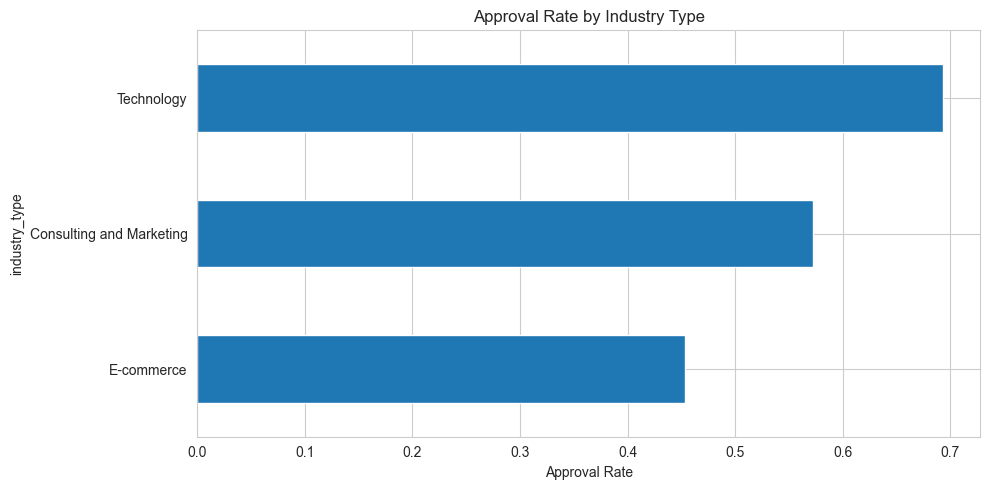

In [13]:
plt.figure(figsize=(10, 5))
industry_approval.sort_values('rate')['rate'].plot(kind='barh')
plt.xlabel('Approval Rate')
plt.title('Approval Rate by Industry Type')
plt.tight_layout()

In [14]:
orgs_funnel['approved_int'] = orgs_funnel['approved'].astype(int)
contingency = pd.crosstab(orgs_funnel['industry_type'], orgs_funnel['approved_int'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-square: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"DOF: {dof}")

Chi-square: 21.34
p-value: 0.0000
DOF: 2


In [15]:
orgs_products = orgs.merge(products, on='organization_id')

product_adoption = orgs_products[orgs_products['is_active']].groupby(['industry_type', 'product']).size().unstack(fill_value=0)
product_adoption

product,Bank Account,Credit Card,Debit Card,Invoicing
industry_type,,,,
Consulting and Marketing,1670,594,5084,19
E-commerce,1703,178,5479,1
Technology,2218,1977,6557,28


In [16]:
orgs_active = orgs_products[orgs_products['is_active']].groupby(['organization_id', 'product']).size().unstack(fill_value=0)
orgs_active_bool = (orgs_active > 0)

print("Orgs with each product active:")
print(orgs_active_bool.sum())
print(f"\nTotal orgs: {len(orgs)}")

Orgs with each product active:
product
Bank Account    173
Credit Card      20
Debit Card      136
Invoicing        16
dtype: int64

Total orgs: 500


In [17]:
orgs_active_dedup = products[products['is_active']].drop_duplicates(['organization_id', 'product'])
orgs_with_industry = orgs_active_dedup.merge(orgs[['organization_id', 'industry_type']], on='organization_id')

adoption_by_industry = orgs_with_industry.groupby(['industry_type', 'product']).size().unstack(fill_value=0)
industry_counts = orgs['industry_type'].value_counts()

adoption_rates = adoption_by_industry.div(industry_counts, axis=0)
adoption_rates

product,Bank Account,Credit Card,Debit Card,Invoicing
industry_type,,,,
Consulting and Marketing,0.362903,0.024194,0.282258,0.040323
E-commerce,0.260090,0.013453,0.219731,0.004484
Technology,0.457516,0.091503,0.339869,0.065359


<Figure size 1000x600 with 0 Axes>

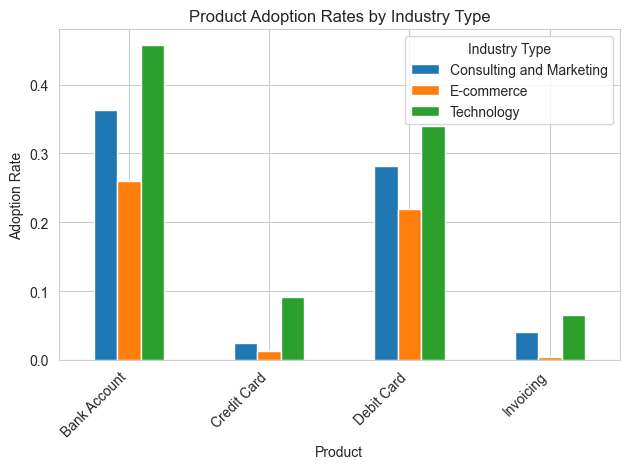

In [18]:
plt.figure(figsize=(10, 6))
adoption_rates.T.plot(kind='bar')
plt.ylabel('Adoption Rate')
plt.xlabel('Product')
plt.title('Product Adoption Rates by Industry Type')
plt.legend(title='Industry Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [19]:
funnel['date'] = pd.to_datetime(funnel['date'])

funnel_wide = funnel.pivot(index='organization_id', columns='funnel_stage', values='date')

funnel_wide['days_to_activation'] = (funnel_wide['first_active'] - funnel_wide['approved']).dt.days

funnel_wide['days_to_activation'].describe()

count    197.000000
mean      37.401015
std       48.921080
min        0.000000
25%        6.000000
50%       18.000000
75%       51.000000
max      277.000000
Name: days_to_activation, dtype: float64

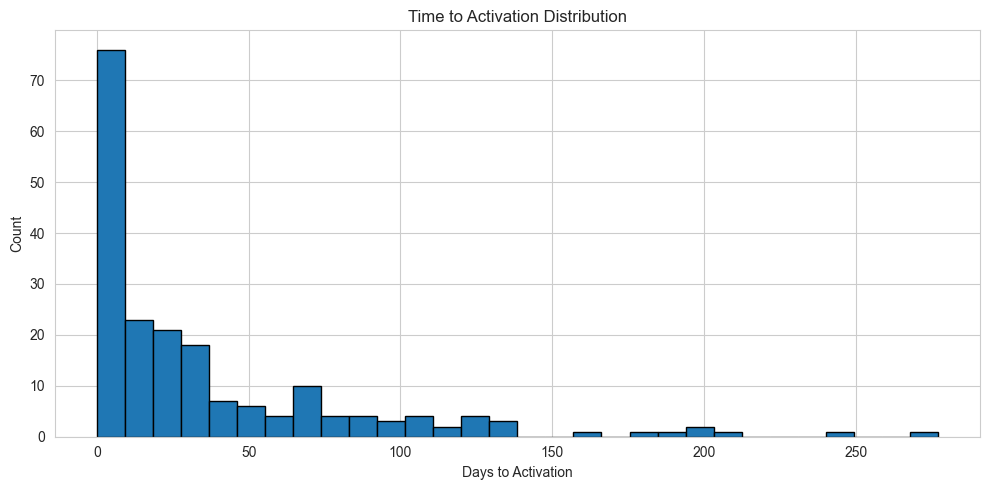

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(funnel_wide['days_to_activation'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Days to Activation')
plt.ylabel('Count')
plt.title('Time to Activation Distribution')
plt.tight_layout()

In [21]:
funnel_with_industry = funnel_wide.reset_index().merge(orgs[['organization_id', 'industry_type']], on='organization_id')

activation_by_industry = funnel_with_industry.groupby('industry_type')['days_to_activation'].describe()
activation_by_industry

,count,mean,std,min,25%,50%,75%,max
industry_type,,,,,,,,
Consulting and Marketing,51.0,36.333333,48.466346,1.0,6.0,19.0,44.5,200.0
E-commerce,67.0,45.835821,57.741482,0.0,7.0,28.0,57.0,277.0
Technology,79.0,30.936709,39.784142,0.0,6.0,11.0,33.0,187.0


In [22]:
products['day'] = pd.to_datetime(products['day'])

first_use = products[products['is_active']].groupby(['organization_id', 'product'])['day'].min().reset_index()
first_use.columns = ['organization_id', 'product', 'first_active_day']

first_use.head(10)

,organization_id,product,first_active_day
0,org_1042,Bank Account,2024-02-08
1,org_1042,Debit Card,2024-02-12
2,org_1042,Invoicing,2024-08-29
3,org_10702,Bank Account,2024-03-11
4,org_10702,Debit Card,2024-03-11
5,org_10862,Bank Account,2024-06-11
6,org_10862,Debit Card,2024-04-27
7,org_11209,Bank Account,2024-07-23
8,org_11209,Credit Card,2024-04-07
9,org_11209,Debit Card,2024-08-29


In [23]:
earliest_product = first_use.loc[first_use.groupby('organization_id')['first_active_day'].idxmin()]

print("Which product is adopted first:")
print(earliest_product['product'].value_counts())

Which product is adopted first:
product
Bank Account    157
Debit Card       12
Invoicing         6
Credit Card       3
Name: count, dtype: int64


In [24]:
orgs_active_dedup2 = products[products['is_active']].drop_duplicates(['organization_id', 'product'])

products_per_org = orgs_active_dedup2.groupby('organization_id').size()
print("Number of products adopted per org:")
print(products_per_org.value_counts().sort_index())

Number of products adopted per org:
1     39
2    113
3     24
4      2
Name: count, dtype: int64


In [25]:
ever_active = products[products['is_active']].drop_duplicates(['organization_id', 'product'])
last_30_days = products['day'].max() - pd.Timedelta(days=30)
recently_active = products[(products['day'] >= last_30_days) & (products['is_active'])].drop_duplicates(['organization_id', 'product'])

churned = ever_active[~ever_active.set_index(['organization_id', 'product']).index.isin(
    recently_active.set_index(['organization_id', 'product']).index
)]

print(f"Ever active: {len(ever_active)}")
print(f"Active in last 30 days: {len(recently_active)}")
print(f"Churned: {len(churned)}")
print(f"\nChurn by product:")
print(churned['product'].value_counts())

Ever active: 345
Active in last 30 days: 264
Churned: 81

Churn by product:
product
Bank Account    42
Debit Card      27
Invoicing        7
Credit Card      5
Name: count, dtype: int64


In [26]:
churn_by_product = churned['product'].value_counts()
ever_active_by_product = ever_active['product'].value_counts()

churn_rates = churn_by_product / ever_active_by_product
churn_rates.sort_values(ascending=False)

product
Invoicing       0.437500
Credit Card     0.250000
Bank Account    0.242775
Debit Card      0.198529
Name: count, dtype: float64

In [27]:
activated_orgs = funnel[(funnel['funnel_stage'] == 'first_active') & (funnel['date'].notna())]['organization_id'].unique()
orgs['activated'] = orgs['organization_id'].isin(activated_orgs)

segment_activation = orgs.groupby('segment_growth_potential')['activated'].agg(['sum', 'count'])
segment_activation['rate'] = segment_activation['sum'] / segment_activation['count']
segment_activation

,sum,count,rate
segment_growth_potential,,,
(1) low,110,345,0.318841
(2) high,87,155,0.561290


In [28]:
orgs_active_dedup3 = products[products['is_active']].drop_duplicates(['organization_id', 'product'])
orgs_with_segment = orgs_active_dedup3.merge(orgs[['organization_id', 'segment_growth_potential']], on='organization_id')

adoption_by_segment = orgs_with_segment.groupby(['segment_growth_potential', 'product']).size().unstack(fill_value=0)
segment_counts = orgs['segment_growth_potential'].value_counts()

adoption_rates_segment = adoption_by_segment.div(segment_counts, axis=0)
adoption_rates_segment

product,Bank Account,Credit Card,Debit Card,Invoicing
segment_growth_potential,,,,
(1) low,0.275362,0.008696,0.217391,0.014493
(2) high,0.503226,0.109677,0.393548,0.070968
